## PCA
주성분 분석(Principal Component Analysis): 대표적인 차원 축소 알고리즘 중 하나\
주성분 벡터: 원본 데이터에 존재하는 어떤 방향. 주성분 벡터의 원소의 개수는 원본 데이터셋의 특성 개수

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 50개의 주성분
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


In [3]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

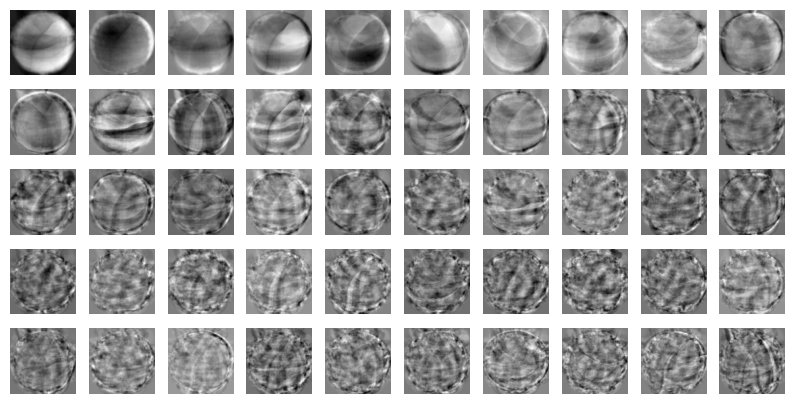

In [4]:
# 원본 데이터에서 분산이 큰 방향을 순서대로 나타냄
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [5]:
print('원본 데이터의 shape:', fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print('변환 후 shape:', fruits_pca.shape)

원본 데이터의 shape: (300, 10000)
변환 후 shape: (300, 50)


In [6]:
# 그렇다면 축소한 차원을 다시 늘릴 수도 있을까?
fruits_inverse = pca.inverse_transform(fruits_pca)
print('다시 늘린 데이터:', fruits_inverse.shape)

다시 늘린 데이터: (300, 10000)


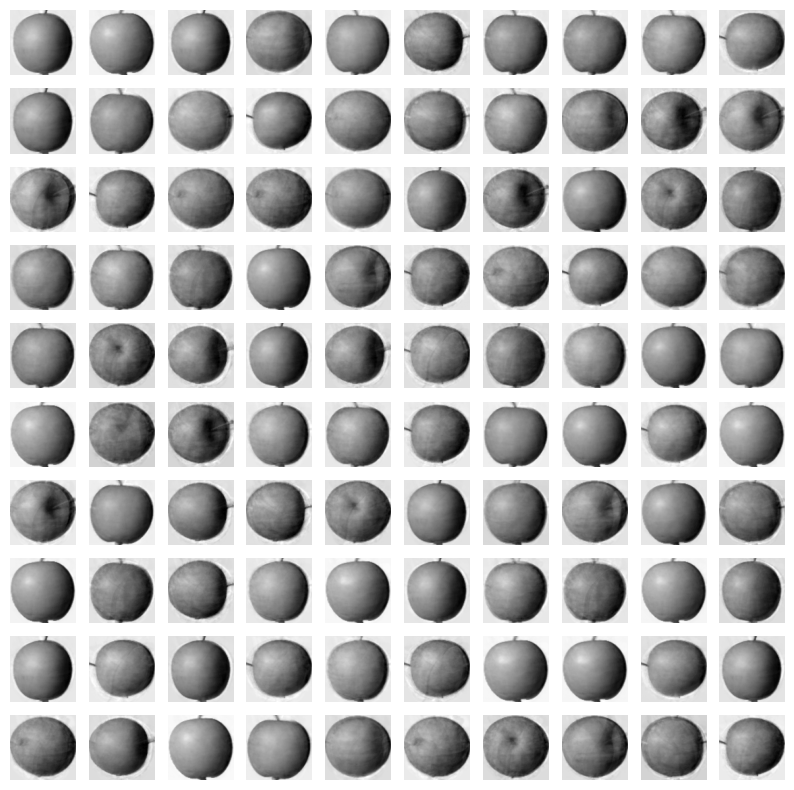

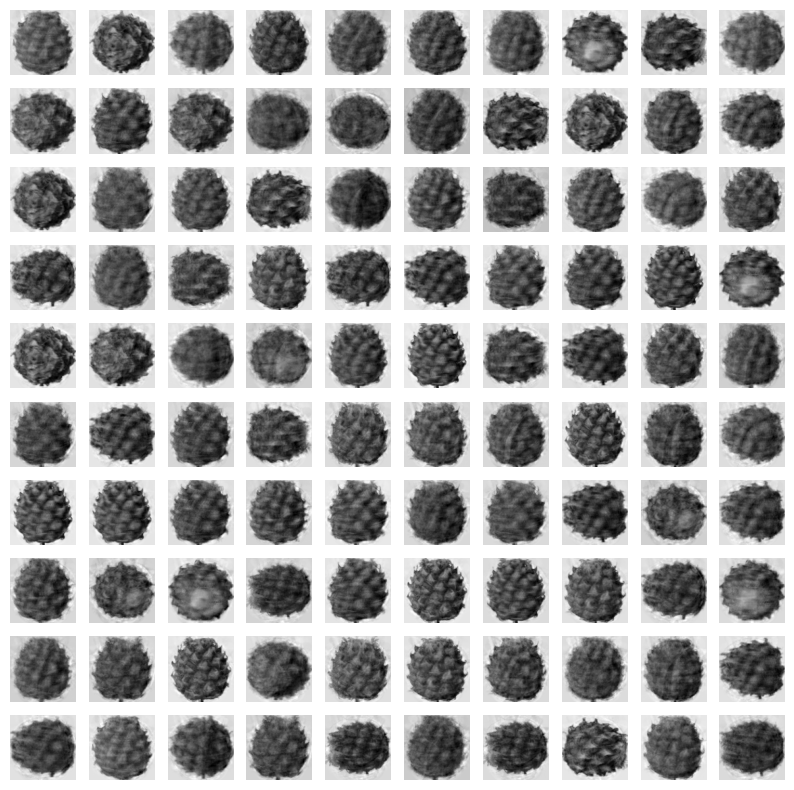

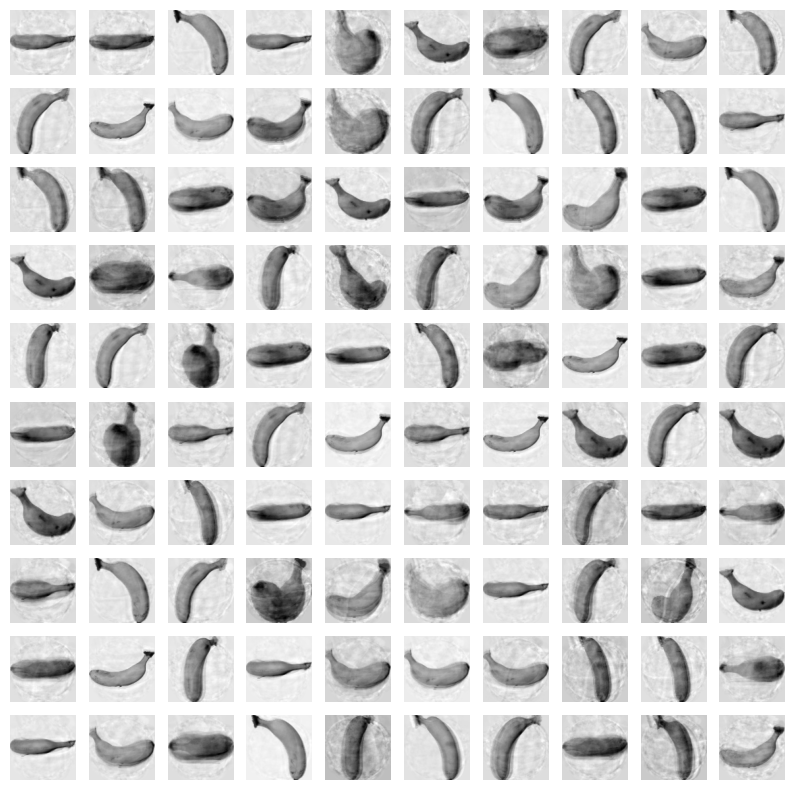

In [7]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for i in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[i:i + 100])
    print()

설명된 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는가?

In [8]:
# 92% 이상의 분산을 유지하고 있음!
print(np.sum(pca.explained_variance_ratio_))

0.9214677774842364


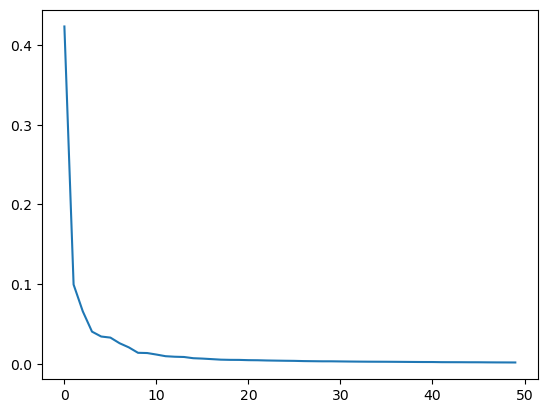

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.show() # 처음 10개의 주성분이 대부분 데이터의 분산을 표현함

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.2737612247467041


In [11]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.013175058364868163


PCA - 공간도 감소, 시간도 감소, 일반화율도 높임

In [12]:
pca = PCA(n_components=0.5).fit(fruits_2d) # 설명된 분산의 50%를 만족하게끔 모델을 만들자!
print(pca.n_components_)                   # 근데 단 2개로 충분하다네...

2


In [13]:
fruits_pca = pca.transform(fruits_2d)
print('변환된 shape:', fruits_pca.shape)

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

변환된 shape: (300, 2)
0.9966666666666667
0.01715993881225586


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

점수가 충분히 괜찮으므로 위 경고는 무시한다.

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=10, random_state=42).fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


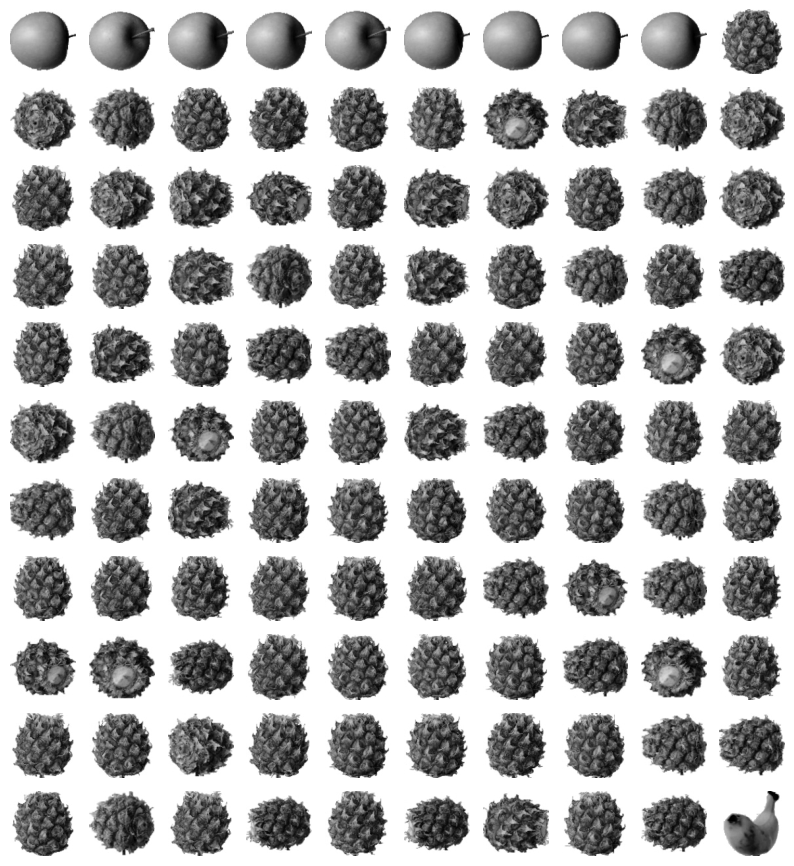

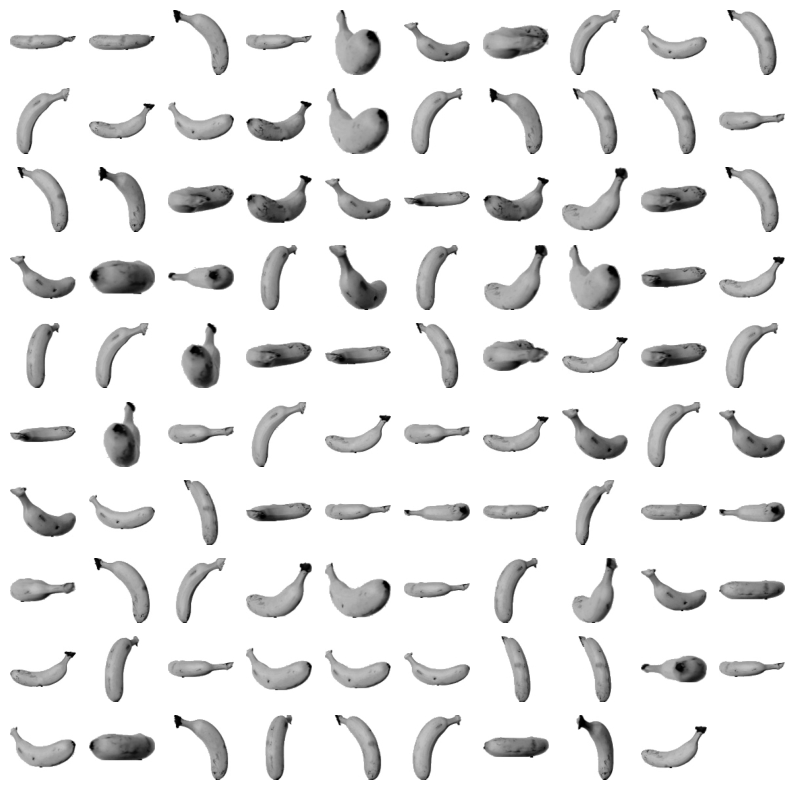

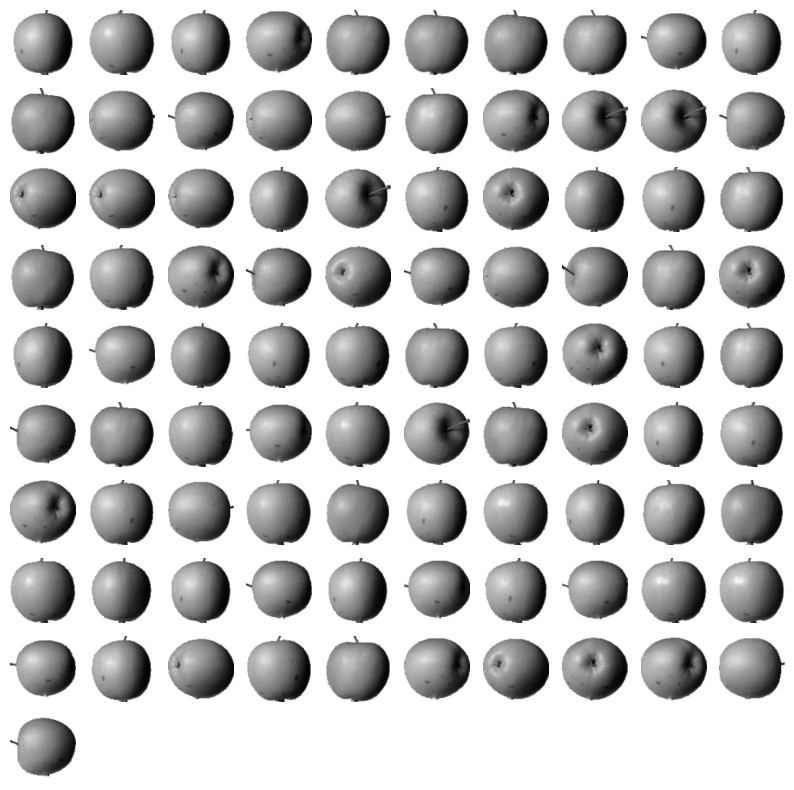

In [17]:
for l in range(0, 3):
    draw_fruits(fruits[km.labels_ == l])
    print()

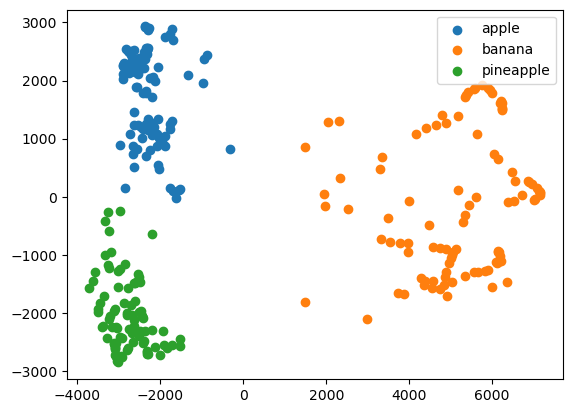

In [18]:
# 이제 차원이 두 개밖에 없으니 2차원 시각화가 가능
for l in range(0, 3):
    data = fruits_pca[km.labels_ == l]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()